<a href="https://www.kaggle.com/code/salmanasri/notebook0af945a07f?scriptVersionId=196936064" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [9]:
df = pd.read_csv(r'/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv') 

In [10]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [12]:
df[df.duplicated]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [13]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [14]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [15]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [18]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

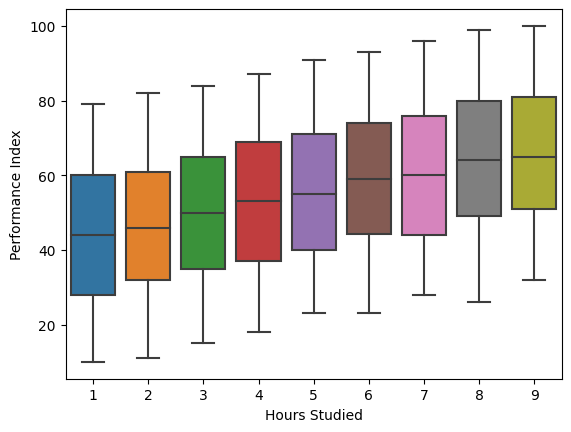

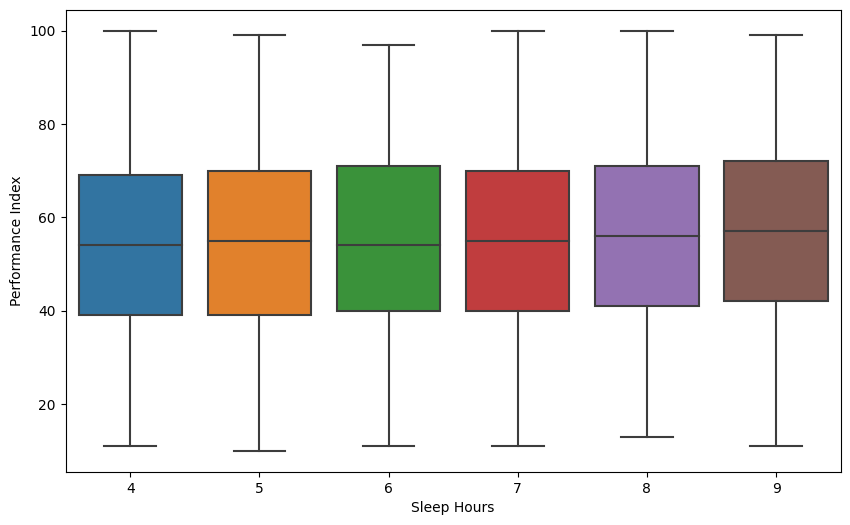

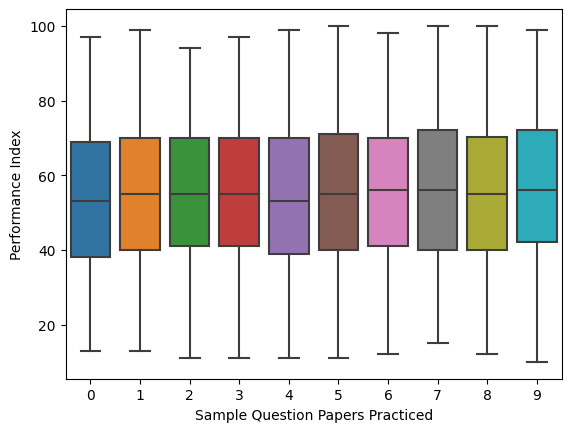

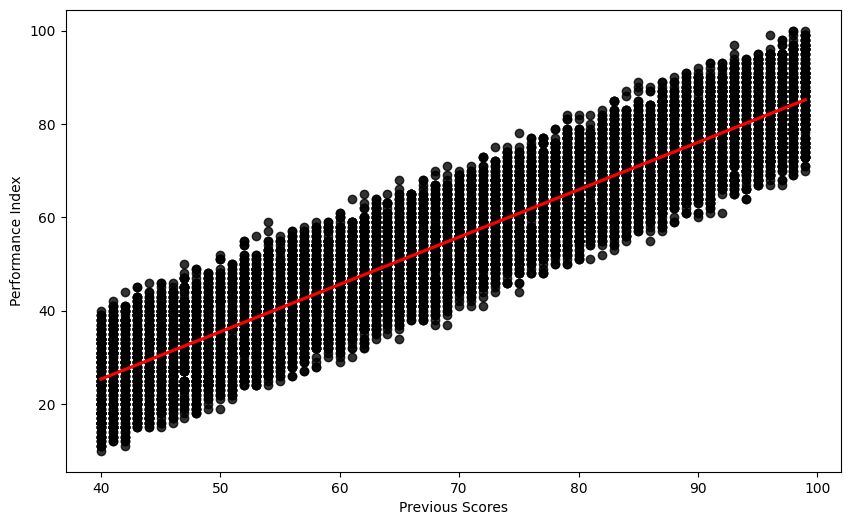

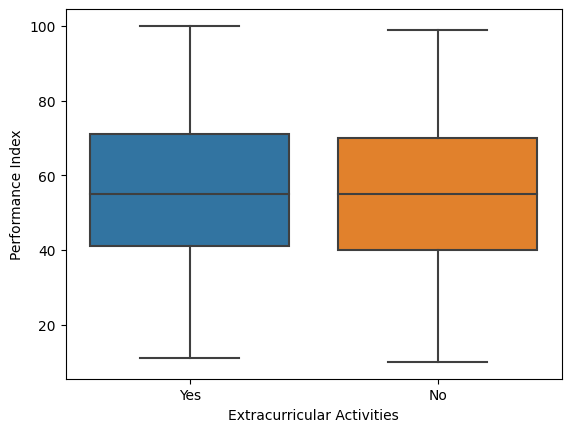

In [19]:
sns.boxplot(data=df, x ='Hours Studied', y = 'Performance Index' )
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x ='Sleep Hours', y = 'Performance Index' )
plt.show()
sns.boxplot(data=df, x ='Sample Question Papers Practiced', y = 'Performance Index' )
plt.show()
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x ='Previous Scores', y = 'Performance Index', scatter_kws={'color':'black'},
line_kws={'color':'red'})
plt.show()
sns.boxplot(data=df, x = 'Extracurricular Activities' , y = 'Performance Index')
plt.show()

<Axes: >

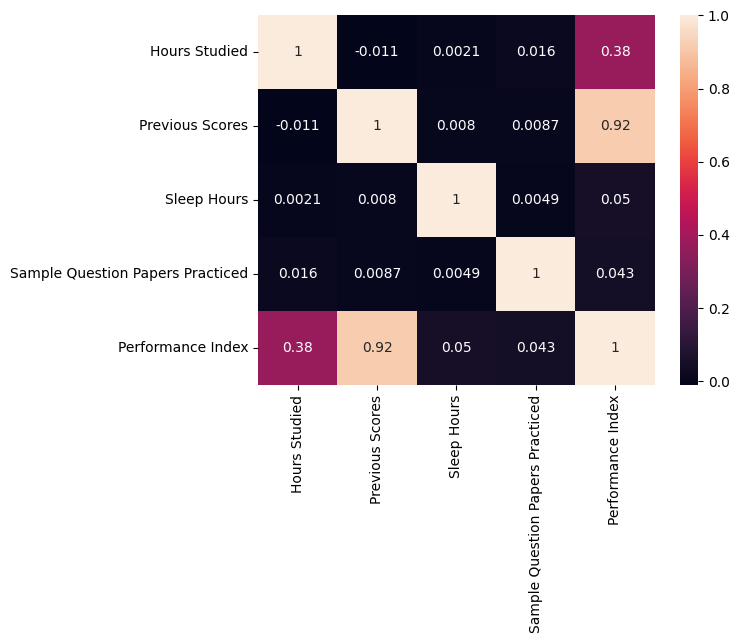

In [20]:
df_modified = df[['Hours Studied', 'Previous Scores',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']]

sns.heatmap(df_modified.corr(),annot=True)

In [21]:
x = df[['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced', 'Sleep Hours']]
y = df['Performance Index']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [23]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [24]:
print(model.coef_)
print(model.intercept_)

[2.85664817 1.01750079 0.19575849 0.48679392]
-33.78347623928659


In [25]:
y_pred = model.predict(x_test)
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")


Mean Squared Error: 4.325964864525802
Root Mean Squared Error: 2.0798953974961822
Mean Absolute Error: 1.6659179211322848
R2 Score: 0.9883463032979831


<Axes: xlabel='Actual Value', ylabel='Prediction'>

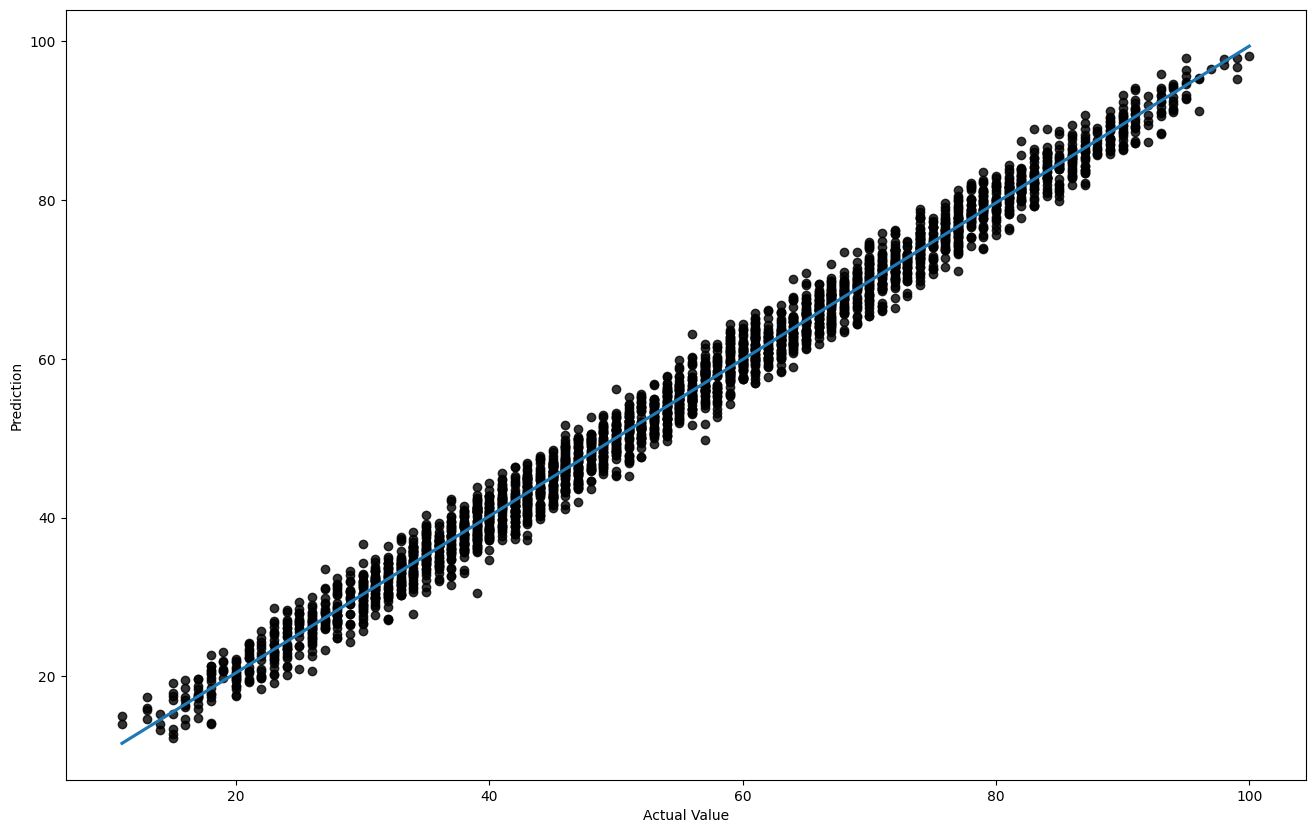

In [26]:
plt.figure(figsize=(16, 10))
pred_true = pd.DataFrame({"Actual Value": y_test, "Prediction": y_pred})
sns.regplot(data = pred_true, y= "Prediction", x="Actual Value", scatter_kws ={"color": "black"} )